### Social Media Tweet Analysis on Twitter Dataset

*   Topic Modeling on Twitter Dataset
*   Reference for [Topic modeling ](https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24)
*   Sentiment analysis on Twitter Dataset








### **Business understanding**

### **Topic modeling**
Topic modeling is a type of statistical model for discovering the abstract "topics" that occur in a collection of texts.

 **Topic models** are built around the idea that the semantics of our document are actually being governed by some hidden, or “latent,” variables that we are not observing.

It is an unsupervised approach used for finding and observing the bunch of words (called “topics”) in large clusters of texts.

The important libraries used to perform the Topic Modeling are: Pandas, Gensim, pyLDAvis

*   Our task here is to discover abstract topics from tweets.


### **Sentiment analysis**
 It is used in social media monitoring, allowing businesses to gain insights about how customers feel about certain topics, and detect urgent issues in real time before they spiral out of control.


*   Our task here is to classify a tweet as a positive or negative tweet sentiment wise.




**Topic modeling **is a machine learning technique that automatically analyzes text data to determine cluster words for a set of documents. 


*   unsupervised machine learning because it doesn’t require a predefined list of tags or training data that’s been previously classified by humans.
*   doesn’t require training, it’s a quick and easy way to start analyzing your data.

## Data Understanding
### Loading necessary packages

In [50]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
from gensim.models import CoherenceModel
from gensim import corpora
import pandas as pd
from pprint import pprint
import string
import os
import re

Data acquisition


In [51]:
#data loader class
class DataLoader:
    def __init__(self,dir_name,file_name):
        self.dir_name = dir_name
        self.file_name = file_name
    
    def read_csv(self):
        os.chdir(self.dir_name)
        tweets_df=pd.read_csv(self.file_name)
        return tweets_df
    

In [52]:
#object creation
DataLoader_obj= DataLoader('./','cleaned_tweet_data.csv')


In [53]:
tweets_df=DataLoader_obj.read_csv()
tweets_df.dropna()


,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,screen_count,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries


In [54]:
len(tweets_df)

14532

In [55]:
tweets_df.head()

,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,screen_count,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries
0,2022-08-02 15:02:35+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi \n#Taipei \n#taiwan\n#XiJinping \n#Chi...,pelosi taipei taiwanxijinp china verg,"(0.0, 0.0)",0.00,0.000,en,10841,0,NassimaLilEmy,0,64,47,False,"[{'text': 'Pelosi', 'indices': [0, 7]}, {'text...",[],Algérie,NaN
1,2022-08-04 01:42:24+00:00,"<a href=""http://twitter.com/download/android"" ...",When you're missing her but she's far.\n#Taiwa...,your miss shes,"(-0.05, 0.525)",-0.05,0.525,en,852,0,MukukaReal,0,119,179,False,"[{'text': 'Taiwan', 'indices': [39, 46]}, {'te...",[],Ndola,NaN
2,2022-08-02 14:45:47+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Twitter will make laugh and scared on the #Pel...,twitter laugh scar pelosi taiwan visit,"(0.3, 0.1)",0.30,0.100,en,30964,0,deusthengo,10,6413,6769,NaN,"[{'text': 'Pelosi', 'indices': [42, 49]}]",[],Lilongwe,NaN
3,2022-08-02 12:53:29+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...","@flightradar24 I hope she makes it, otherwise ...",flightradar hope make offici start wwiii,"(0.0, 0.0)",0.00,0.000,en,7112,0,bIackdot,5,12,13,NaN,"[{'text': 'WWIII', 'indices': [83, 89]}]","[{'screen_name': 'flightradar24', 'name': 'Fli...",Zambia,NaN
4,2022-08-01 21:18:51+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Who invited Mrs #Pelosi to Taiwan,invit pelosi taiwan,"(0.0, 0.0)",0.00,0.000,en,7112,0,bIackdot,5,12,13,NaN,"[{'text': 'Pelosi', 'indices': [16, 23]}]",[],Zambia,NaN


In [56]:
class PrepareData:
  def __init__(self,df):
    self.df=df
    
  def preprocess_data(self):
    tweets_df = self.df.loc[self.df['lang'] =="en"]

    
    #text Preprocessing
    tweets_df['clean_text']=tweets_df['clean_text'].astype(str)
    tweets_df['clean_text'] = tweets_df['clean_text'].apply(lambda x: x.lower())
    tweets_df['clean_text']= tweets_df['clean_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))
    
    #Converting tweets to list of words For feature engineering
    sentence_list = [tweet for tweet in tweets_df['clean_text']]
    word_list = [sent.split() for sent in sentence_list]
    # print(word_list)

    #Create dictionary which contains Id and word 
    word_to_id = corpora.Dictionary(word_list) #generate unique tokens
    #  we can see the word to unique integer mapping
    # print(word_to_id.token2id)
    # using bag of words(bow), we create a corpus that contains the word id and its frequency in each document.
    corpus_1= [word_to_id.doc2bow(tweet) for tweet in word_list]
    # TFIDF

    return word_list, word_to_id, corpus_1


In [57]:
PrepareData_obj = PrepareData(tweets_df)
word_list ,id2word, corpus = PrepareData_obj.preprocess_data()

In [58]:
print(corpus[:10])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(5, 1), (6, 1), (7, 1)], [(1, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)], [(13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1)], [(1, 1), (10, 1), (19, 1)], [(18, 1), (20, 1), (21, 1), (22, 1), (23, 1)], [(24, 1), (25, 1), (26, 1)], [(0, 2), (10, 1), (27, 1), (28, 2), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 1), (35, 1), (36, 1), (37, 2), (38, 1), (39, 2), (40, 1), (41, 1), (42, 1)], [(1, 1), (33, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1)], [(0, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1)]]


In [59]:
id_words = [[(id2word[id], count) for id, count in line] for line in corpus]

In [60]:
print(id_words[-10:])

[[('china', 1), ('taiwan', 2), ('state', 1), ('unit', 1), ('ukrain', 1), ('like', 1), ('russia', 1), ('enter', 1)], [('taiwan', 1), ('region', 1), ('defend', 1), ('support', 1), ('indopacif', 1), ('urgent', 1), ('whitehous', 1)], [('china', 1), ('pelosi', 1), ('taiwan', 1), ('visit', 1), ('state', 1), ('unit', 1), ('contact', 1)], [('pelosi', 1), ('taiwan', 1), ('carri', 1), ('nanci', 1), ('land', 1), ('plane', 1), ('bnonew', 1)], [('china', 1), ('pelosi', 1), ('taiwan', 1), ('visit', 1), ('state', 1), ('escal', 1), ('decis', 1), ('tension', 1), ('secretari', 1), ('anthoni', 1), ('aloneand', 1), ('blinken', 1)], [('china', 1), ('wwiii', 1), ('world', 1), ('face', 1), ('long', 1), ('global', 1), ('kosovo', 1), ('serbia', 1), ('ignit', 1), ('leftist', 1)], [('china', 2), ('play', 1), ('game', 1), ('battleship', 1), ('mean', 1)], [('spar', 1), ('taipeipelosi', 1), ('wheel', 1)], [('approach', 1), ('final', 1), ('spar', 1), ('taipeipelosi', 1)], [('pelosi', 1), ('million', 1), ('friend', 1

### Topic Modeling using Latent Dirichlet Allocation 
based on the distributional hypothesis, (i.e. similar topics make use of similar words) and the statistical mixture hypothesis (i.e. documents talk about several topics) for which a statistical distribution can be determined. 

*  The purpose of LDA is mapping each teweets in our corpus to a set of topics 
which covers a good deal of the words in the tweet



In [61]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [62]:
pprint(lda_model.print_topics())

[(0,
  '0.027*"taiwan" + 0.016*"tension" + 0.015*"look" + 0.013*"prepar" + '
  '0.012*"welcom" + 0.010*"mean" + 0.008*"call" + 0.008*"world" + 0.008*"leav" '
  '+ 0.008*"nato"'),
 (1,
  '0.048*"taiwan" + 0.025*"make" + 0.015*"kickboost" + 0.014*"right" + '
  '0.011*"biden" + 0.011*"helicopt" + 0.010*"warn" + 0.010*"order" + '
  '0.009*"need" + 0.009*"plan"'),
 (2,
  '0.043*"taiwan" + 0.020*"bbnaija" + 0.010*"bbnajia" + 0.009*"asuu" + '
  '0.008*"media" + 0.008*"happi" + 0.008*"lekki" + 0.007*"lago" + '
  '0.007*"month" + 0.007*"august"'),
 (3,
  '0.044*"taiwan" + 0.015*"bbnaija" + 0.014*"pelosi" + 0.013*"presid" + '
  '0.013*"sabinus" + 0.011*"thank" + 0.010*"million" + 0.010*"chinataiwan" + '
  '0.009*"nigeria" + 0.009*"peterobi"'),
 (4,
  '0.100*"taiwan" + 0.081*"china" + 0.064*"pelosi" + 0.022*"visit" + '
  '0.017*"chines" + 0.014*"nanci" + 0.012*"militari" + 0.010*"speaker" + '
  '0.010*"wwiii" + 0.009*"hous"')]


In [63]:
pprint(lda_model.show_topics(formatted=False))

[(0,
  [('taiwan', 0.02662052),
   ('tension', 0.015543346),
   ('look', 0.015109089),
   ('prepar', 0.012916095),
   ('welcom', 0.011676011),
   ('mean', 0.010190529),
   ('call', 0.008447665),
   ('world', 0.008238018),
   ('leav', 0.007855952),
   ('nato', 0.0076185395)]),
 (1,
  [('taiwan', 0.048437186),
   ('make', 0.024982043),
   ('kickboost', 0.014696763),
   ('right', 0.01358312),
   ('biden', 0.011341585),
   ('helicopt', 0.011325149),
   ('warn', 0.010150124),
   ('order', 0.009861901),
   ('need', 0.009385931),
   ('plan', 0.009218196)]),
 (2,
  [('taiwan', 0.042850744),
   ('bbnaija', 0.01995697),
   ('bbnajia', 0.010352383),
   ('asuu', 0.009302617),
   ('media', 0.008080793),
   ('happi', 0.007987372),
   ('lekki', 0.007827842),
   ('lago', 0.0073120142),
   ('month', 0.007124584),
   ('august', 0.006622251)]),
 (3,
  [('taiwan', 0.04389574),
   ('bbnaija', 0.014796921),
   ('pelosi', 0.014061289),
   ('presid', 0.0132307345),
   ('sabinus', 0.013064933),
   ('thank', 0.

# **Model Analysis**

Perplexity is also a measure of model quality and in natural language processing is often used as “perplexity per number of words”. It describes how well a model predicts a sample, i.e. how much it is “perplexed” by a sample from the observed data. The lower the score, the better the model for the given data.

A coherence matrix is used to test the model for accuracy. Topic coherence is a measure that compares different topic models based on their human-interpretability. The coherence score ‘C_V’ provides a numerical value to the interpretability of the topics

In [17]:
# Compute Perplexity

#It's a measure of how good the model is. The lower the better. Perplexity is a negative value
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
doc_lda = lda_model[corpus]


# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=word_list, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\n Ldamodel Coherence Score/Accuracy on Tweets: ', coherence_lda)


Perplexity:  -7.295805379261857

 Ldamodel Coherence Score/Accuracy on Tweets:  0.42621601809145837


Basic Ldamodel Coherence Score 0.42 This means that the model has performed reasonably well in topic modeling.

**Anlayizing results**
Exploring the Intertopic Distance Plot can help you learn about how topics relate to each other, including potential higher-level structure between groups of topics

In [18]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.185512  0.032056       1        1  32.849229
2     -0.118659  0.002653       2        1  21.654541
1     -0.156860  0.009023       3        1  20.717455
4      0.193427 -0.261265       4        1  12.565788
0      0.267604  0.217533       5        1  12.212986, topic_info=         Term          Freq         Total Category  logprob  loglift
22        the  10388.000000  10388.000000  Default  30.0000  30.0000
29          i   1355.000000   1355.000000  Default  29.0000  29.0000
465       usa   1180.000000   1180.000000  Default  28.0000  28.0000
86        you   2962.000000   2962.000000  Default  27.0000  27.0000
3          of   5429.000000   5429.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
17        and    322.164499   5802.627379   Topic5  -4.8541  -0.7883
2       china    305.957087   5129.954433   Topic5  -4.9057  -0.7167
5      pelosi    274.011088   4632.017467   Topic5  -5.0160  -0.7249
90         by    188.430039    892.030160   Topic5  -5.3904   0.5479
1007  sabinus    171.957879    473.580790   Topic5  -5.4819   1.0896

[313 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         1  0.370330      a
0         2  0.411248      a
0         3  0.200704      a
0         4  0.017869      a
41        1  0.123899  about
...     ...       ...    ...
86        3  0.323725    you
86        4  0.171146    you
344       2  0.459490   your
344       3  0.493057   your
344       5  0.047739   your

[399 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 5, 1])

In [37]:
# Tranining on different values of topics/k
# word_list ,id2word, corpus

for k in range(2,25): # Train LDA on different values of k
    print('Round: '+str(k))
    LDA = gensim.models.ldamulticore.LdaMulticore
    ldamodel = LDA(corpus, num_topics=k, id2word = id2word, passes=20, iterations=100,
                   chunksize = 10000, eval_every = 10, random_state=20)
    
    ldamodel.save(f"ldamodel_for_{k}topics_Run_10")
    pprint(ldamodel.print_topics())

Round: 2
[(0,
  '0.038*"the" + 0.035*"taiwan" + 0.022*"to" + 0.021*"china" + 0.019*"of" + '
  '0.016*"pelosi" + 0.016*"in" + 0.013*"and" + 0.012*"a" + 0.011*"is"'),
 (1,
  '0.031*"taiwan" + 0.023*"the" + 0.023*"to" + 0.019*"and" + 0.014*"of" + '
  '0.013*"is" + 0.013*"for" + 0.013*"a" + 0.012*"in" + 0.011*"you"')]
Round: 3


KeyboardInterrupt: 

In [19]:
# Coherence score
# coherence = []
# for k in range(2,25):
#     LDA = gensim.models.ldamulticore.LdaMulticore
#     ldamodel = LDA.load(f"ldamodel_for_{k}topics_Run_10")
#     cm = gensim.models.coherencemodel.CoherenceModel(model=ldamodel, texts=Complete_Content, dictionary=dictionary, coherence='c_v')
#     coherence.append((k, 'default', 'default', cm.get_coherence()))

# Sentiment Analysis

[Notebook reference](https://github.com/lazuxd/simple-imdb-sentiment-analysis/blob/master/sentiment-analysis.ipynb)

## Building a Sentiment Classifier using Scikit-Learn



> &nbsp;&nbsp;&nbsp;&nbsp;**Sentiment analysis**, an important area in Natural Language Processing, is the process of automatically detecting affective states of text. Sentiment analysis is widely applied to voice-of-customer materials such as product reviews in online shopping websites like Amazon, movie reviews or social media. It can be just a basic task of classifying the polarity of a text as being positive/negative or it can go beyond polarity, looking at emotional states such as "happy", "angry", etc.

Lets build a classifier of  about tweets on china tiawan conflict, the task is to predict whether a tweet contains positive, negative, or neutral sentiment about the conflict. 


### Import required libraries

In [20]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
# Read the Data
DataLoader_obj= DataLoader('./','cleaned_tweet_data.csv')

In [25]:
tweets = DataLoader_obj.read_csv()

In [26]:
tweets.head()

,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,screen_count,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries
0,2022-08-02 15:02:35+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi \n#Taipei \n#taiwan\n#XiJinping \n#Chi...,Pelosi Taipei taiwanXiJinping China On a verge...,"(0.0, 0.0)",0.00,0.000,en,10841,0,NassimaLilEmy,0,64,47,False,"[{'text': 'Pelosi', 'indices': [0, 7]}, {'text...",[],Algérie,NaN
1,2022-08-04 01:42:24+00:00,"<a href=""http://twitter.com/download/android"" ...",When you're missing her but she's far.\n#Taiwa...,When youre missing her but shes farTaiwanCoupl...,"(-0.05, 0.525)",-0.05,0.525,en,852,0,MukukaReal,0,119,179,False,"[{'text': 'Taiwan', 'indices': [39, 46]}, {'te...",[],Ndola,NaN
2,2022-08-02 14:45:47+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Twitter will make laugh and scared on the #Pel...,Twitter will make laugh and scared on the Pelo...,"(0.3, 0.1)",0.30,0.100,en,30964,0,deusthengo,10,6413,6769,NaN,"[{'text': 'Pelosi', 'indices': [42, 49]}]",[],Lilongwe,NaN
3,2022-08-02 12:53:29+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...","@flightradar24 I hope she makes it, otherwise ...",flightradar24 I hope she makes it otherwise it...,"(0.0, 0.0)",0.00,0.000,en,7112,0,bIackdot,5,12,13,NaN,"[{'text': 'WWIII', 'indices': [83, 89]}]","[{'screen_name': 'flightradar24', 'name': 'Fli...",Zambia,NaN
4,2022-08-01 21:18:51+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Who invited Mrs #Pelosi to Taiwan,Who invited Mrs Pelosi to Taiwan,"(0.0, 0.0)",0.00,0.000,en,7112,0,bIackdot,5,12,13,NaN,"[{'text': 'Pelosi', 'indices': [16, 23]}]",[],Zambia,NaN


>> ### Basic EDA

In [27]:
# plot params
plot_size = plt.rcParams["figure.figsize"] 
plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 


<AxesSubplot:ylabel='clean_text'>

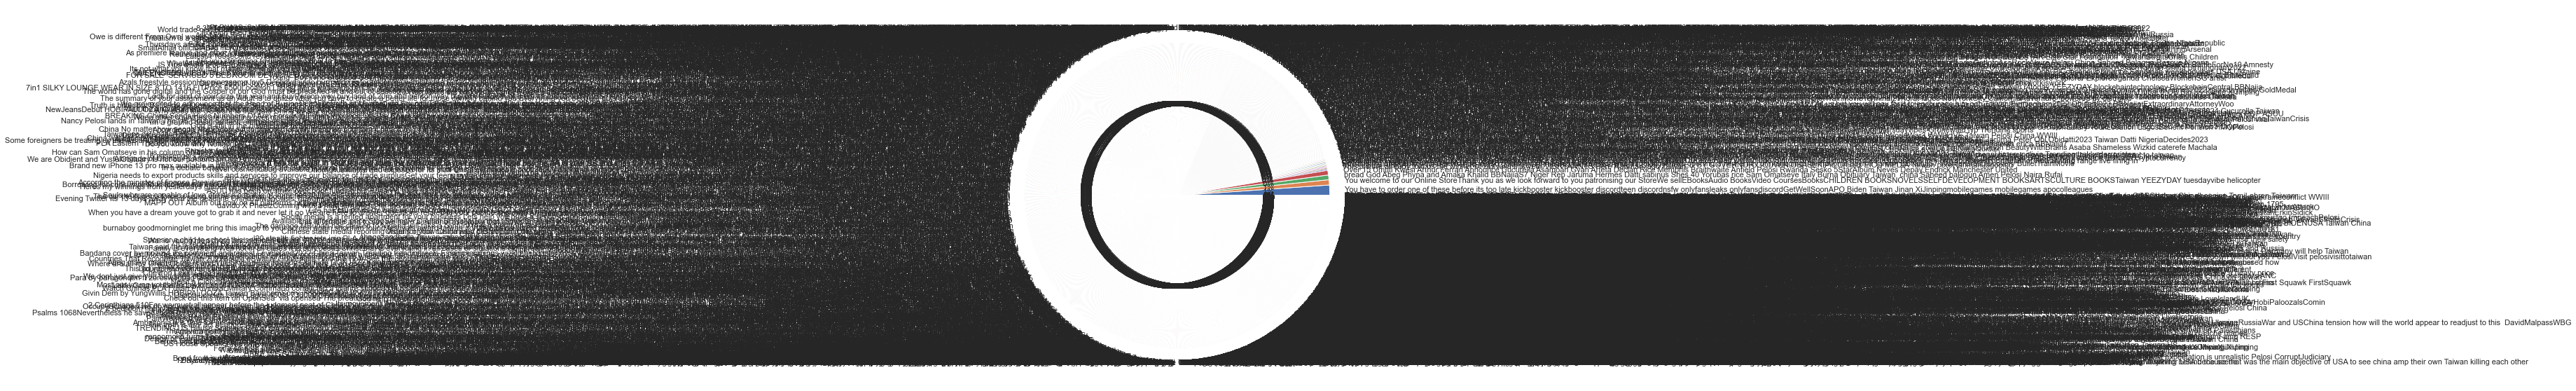

In [34]:
# number of tweets for each airline
sns.set(rc={'figure.figsize':(14,10)})
tweets.clean_text.value_counts().plot(kind='pie', autopct='%1.0f%%')

<AxesSubplot:ylabel='sentiment'>

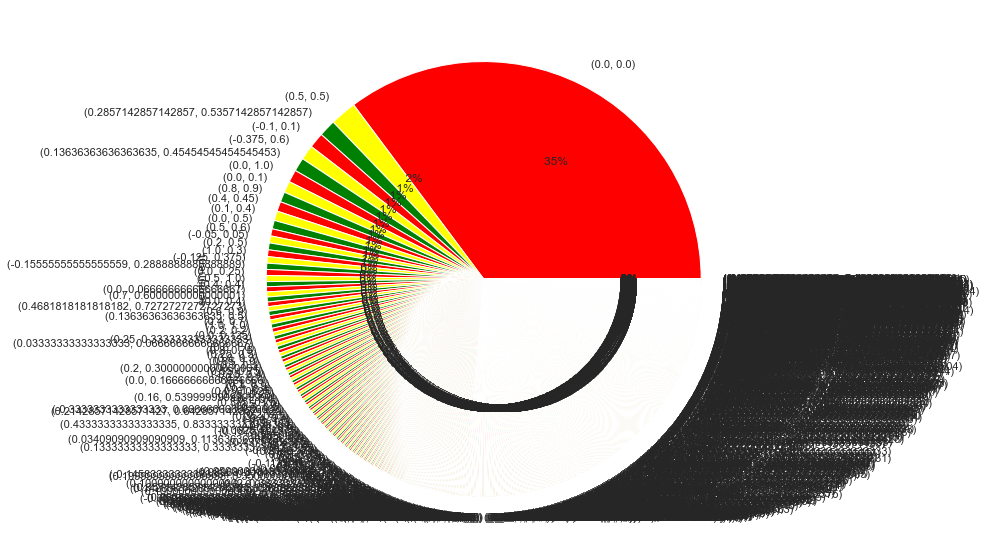

In [31]:
# Distribution of sentiments across all the tweets.
sns.set(rc={'figure.figsize':(14,10)})
tweets.sentiment.value_counts().plot(kind='pie', autopct='%10.0f%%', colors=["red", "yellow", "green"])

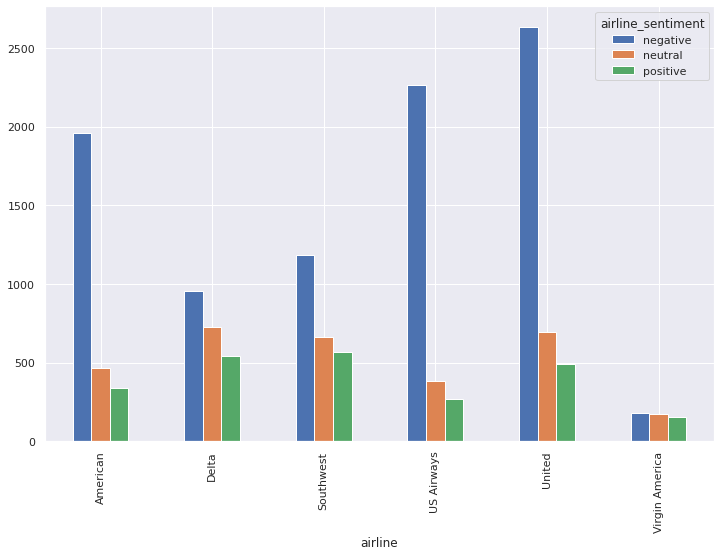

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
airline_sentiment = tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

>> ### Data Cleaning

In [ ]:
tweets.columns

In [ ]:
# Selecting the feature and the label
features = airline_tweets_df.iloc[:, 10].values
labels = airline_tweets_df.iloc[:, 1].values

In [ ]:
# Data Cleaning using regular expression
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

>> ### Representing Text in Numeric Form

Statistical algorithms use mathematics to train machine learning models. However, mathematics only work with numbers. To make statistical algorithms work with text, we first have to convert text to numbers. We will be using TF-IDF(Term frequency and Inverse Document frequency.)

TF-IDF gives weight for each unique word set. In TF-IDF,  words that occur less in all the documents and more in individual document contribute more towards classification.
 

$$\begin{align}\frac{\text{term frequency}}{\text{document frequency}} &= \text{term frequency} \cdot \frac{1}{\text{document frequency}} \\ &= \text{term frequency} \cdot \text{inverse document frequency} \\ &= \text{tf} \cdot \text{idf}\end{align}$$  
  
&nbsp;&nbsp;&nbsp;&nbsp;Now, there are more ways used to describe both term frequency and inverse document frequency. But the most common way is by putting them on a logarithmic scale:  
  
$$tf(t, d) = log(1+f_{t,d})$$  
$$idf(t) = log(\frac{1+N}{1+n_t})$$  
  
&nbsp;&nbsp;&nbsp;&nbsp;where:  
$$\begin{align}f_{t,d} &= \text{count of term } \textbf{t} \text{ in document } \textbf{d} \\  
N &= \text{total number of documents} \\  
n_t &= \text{number of documents that contain term } \textbf{t}\end{align}$$  
  
<b>We added 1 in the first logarithm to avoid getting $-\infty$ when $f_{t,d}$ is 0. In the second logarithm we added one fake document to avoid division by zero.</b>

There is Python's Scikit-Learn library contains the TfidfVectorizer class that can be used to convert text features into TF-IDF feature vectors. The following script performs this

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features_vectorized = vectorizer.fit_transform(processed_features).toarray()

>> ### Train/test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features_vectorized, labels, test_size=0.2, random_state=0)

>> ### Training the Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

>> ### Prediction

In [ ]:
predictions = text_classifier.predict(X_test)

In [ ]:
predictions[:10]

array(['negative', 'negative', 'negative', 'negative', 'positive',
       'negative', 'negative', 'negative', 'negative', 'negative'],
      dtype=object)

>> ### Evaluation


In [21]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, predictions))

NameError: name 'y_test' is not defined

## References

<sup>(1)</sup> &nbsp;[Sentiment Analysis - Wikipedia](https://en.wikipedia.org/wiki/Sentiment_analysis)  
<sup>(1)</sup> &nbsp;[Sentiment Analysis - Airline tweet sentiment analysis with sckit-learn](https://stackabuse.com/python-for-nlp-sentiment-analysis-with-scikit-learn/)  
<sup>(2)</sup> &nbsp;[Learning Word Vectors for Sentiment Analysis](http://ai.stanford.edu/~amaas/papers/wvSent_acl2011.pdf)  
<sup>(3)</sup> &nbsp;[Bag-of-words model - Wikipedia](https://en.wikipedia.org/wiki/Bag-of-words_model)  
<sup>(4)</sup> &nbsp;[Tf-idf - Wikipedia](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)  
<sup>(5)</sup> &nbsp;[TfidfTransformer - Scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html)  
<sup>(6)</sup> &nbsp;[Stop words - Wikipedia](https://en.wikipedia.org/wiki/Stop_words)  
<sup>(7)</sup> &nbsp;[A list of English stopwords](https://gist.github.com/sebleier/554280)  
<sup>(8)</sup> &nbsp;[CountVectorizer - Scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)  
<sup>(9)</sup> &nbsp;[Scipy sparse matrices](https://docs.scipy.org/doc/scipy/reference/sparse.html)  
<sup>(10)</sup> [Compressed Sparse Row matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html#scipy.sparse.csr_matrix)  
<sup>(11)</sup> [SGDClassifier - Scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)  
<sup>(12)</sup> [RandomizedSearchCV - Scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)  
<sup>(13)</sup> [Sentiment Classification using Document Embeddings trained with
Cosine Similarity](https://www.aclweb.org/anthology/P19-2057.pdf)  